In [148]:
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
tickers = pd.read_excel('Hang Seng (HSI).xlsx', usecols=["Ticker"])

data = pd.DataFrame(columns=tickers["Ticker"])
for ticker in data.columns:
    data[ticker] = yf.download(ticker,'2016-01-01','2016-12-31')['Adj Close']

data.dropna(axis='columns',how='all', inplace=True)
data.to_excel('outputHKstocks.xlsx', index=False)

In [152]:
data = pd.read_excel('outputHKstocks.xlsx')
for i in range(len(data.columns)):
    data.iloc[:, i] = np.log1p(data.iloc[:, i].pct_change()) # подсчёт логарифмической доходности
data.to_excel('outputHKstocksReturns.xlsx', index=False)

In [154]:
data = pd.read_excel('outputHKstocksReturns.xlsx')
eff = np.array([data.iloc[:, i].mean() for i in range(len(data.columns))]) # подсчёт эффективности
data -= eff[i]
data = data ** 2
risk = np.array([np.sqrt((data.iloc[:, i].sum()) / (len(data) - 1)) for i in range(len(data.columns))]) # подсчёт риска
print(eff, risk)

data_er = pd.DataFrame({'company': data.columns, 'company': data.columns, 'effiency': eff,'risk': risk}) # сбор данных в один датафрейм
data_er.to_excel('outputHKstocksEffRisk.xlsx', index=False)

[ 5.39652103e-04  1.45988909e-04  4.32140994e-04  7.99557172e-05
  2.24459981e-04 -4.46834808e-05  3.60377418e-04  4.94219095e-04
  1.37202147e-03  1.19875672e-04 -1.56943528e-05  2.55216886e-03
  1.86811613e-03  1.68992052e-03  1.79110053e-04  9.10263467e-04
 -1.00614263e-04 -3.84842251e-04  9.92176028e-04  4.42491367e-06
  5.76389915e-04 -3.06843648e-04  6.15540910e-04  1.76176057e-03
  1.96079337e-03  9.33518213e-04  8.20655945e-04 -2.31233353e-05
 -3.82735096e-04  1.86412595e-03  1.08017894e-03  3.27588230e-04
  2.83665655e-04 -2.27412721e-05 -5.77719916e-06 -9.01360066e-05
  1.94891913e-03  3.77147136e-04  1.39124730e-03  9.91300694e-04
  5.33417294e-04  5.86257615e-04 -1.37690606e-04  7.88397011e-04
  6.69985256e-04  2.68926971e-03  9.50884339e-04  1.07008392e-03
  3.47058196e-04  3.66559502e-04] [0.00961425 0.01051561 0.01565867 0.01150915 0.01113994 0.01649503
 0.01566779 0.01529998 0.02469973 0.01119488 0.01609086 0.02760791
 0.03119006 0.01748131 0.02291354 0.02004985 0.01407

In [156]:
data = pd.read_excel('outputHKstocksEffRisk.xlsx')
sector = []
name = []
for ticker in data["company"]:
    try:
        sector.append(yf.Ticker(ticker).info['industry'])
        name.append(yf.Ticker(ticker).info['longName'])
    except KeyError:
        sector.append("No Name")
        name.append("No Name")
data = pd.DataFrame({'ticker': data["company"], 'company': name, 'sector': sector, 'effiency': data["effiency"], 'risk': data["risk"]})
data.to_excel('outputHKstocksEffRisk.xlsx', index=False)

### Итоговая таблица 50 активов, отобранных с помощью HANG SENG PROPERTIES INDEX:

| ticker  | company                                               | sector                                  | effiency     | risk        |
|---------|-------------------------------------------------------|-----------------------------------------|--------------|-------------|
| 0002.HK | CLP Holdings Limited                                  | Utilities - Regulated Electric          | 0.000539652  | 0.009614254 |
| 0003.HK | The Hong Kong and China Gas Company Limited           | Utilities - Regulated Gas               | 0.000145989  | 0.010515613 |
| 0005.HK | HSBC Holdings plc                                     | Banks - Diversified                     | 0.000432141  | 0.01565867  |
| 0006.HK | Power Assets Holdings Limited                         | Utilities - Independent Power Producers | 7.99557E-05  | 0.011509149 |
| 0011.HK | Hang Seng Bank Limited                                | Banks - Regional                        | 0.00022446   | 0.011139942 |
| 0012.HK | Henderson Land Development Company Limited            | Real Estate - Diversified               | -4.46835E-05 | 0.01649503  |
| 0016.HK | Sun Hung Kai Properties Limited                       | Real Estate - Development               | 0.000360377  | 0.015667793 |
| 0017.HK | New World Development Company Limited                 | Real Estate - Diversified               | 0.000494219  | 0.01529998  |
| 0027.HK | Galaxy Entertainment Group Limited                    | Resorts & Casinos                       | 0.001372021  | 0.02469973  |
| 0066.HK | MTR Corporation Limited                               | Railroads                               | 0.000119876  | 0.011194883 |
| 0101.HK | Hang Lung Properties Limited                          | Real Estate Services                    | -1.56944E-05 | 0.016090861 |
| 0175.HK | Geely Automobile Holdings Limited                     | Auto Manufacturers                      | 0.002552169  | 0.02760791  |
| 0285.HK | BYD Electronic (International) Company Limited        | Electronic Components                   | 0.001868116  | 0.031190063 |
| 0288.HK | WH Group Limited                                      | Packaged Foods                          | 0.001689921  | 0.017481309 |
| 0291.HK | China Resources Beer (Holdings) Company Limited       | Beverages - Brewers                     | 0.00017911   | 0.022913544 |
| 0386.HK | China Petroleum & Chemical Corporation                | Oil & Gas Integrated                    | 0.000910263  | 0.020049848 |
| 0388.HK | Hong Kong Exchanges and Clearing Limited              | Financial Data & Stock Exchanges        | -0.000100614 | 0.014077074 |
| 0669.HK | Techtronic Industries Company Limited                 | Tools & Accessories                     | -0.000384842 | 0.017148337 |
| 0700.HK | Tencent Holdings Limited                              | Internet Content & Information          | 0.000992176  | 0.015718325 |
| 0762.HK | China Unicom (Hong Kong) Limited                      | Telecom Services                        | 4.42491E-06  | 0.019189821 |
| 0823.HK | Link Real Estate Investment Trust                     | REIT - Retail                           | 0.00057639   | 0.013111887 |
| 0836.HK | China Resources Power Holdings Company Limited        | Utilities - Independent Power Producers | -0.000306844 | 0.019800477 |
| 0857.HK | PetroChina Company Limited                            | Oil & Gas Integrated                    | 0.000615541  | 0.02170362  |
| 0868.HK | Xinyi Glass Holdings Limited                          | Building Materials                      | 0.001761761  | 0.01946833  |
| 0881.HK | Zhongsheng Group Holdings Limited                     | Auto & Truck Dealerships                | 0.001960793  | 0.024111088 |
| 0883.HK | CNOOC Limited                                         | Oil & Gas E&P                           | 0.000933518  | 0.02346876  |
| 0939.HK | China Construction Bank Corporation                   | Banks - Diversified                     | 0.000820656  | 0.014860657 |
| 0941.HK | China Mobile Limited                                  | Telecom Services                        | -2.31233E-05 | 0.013397745 |
| 0960.HK | Longfor Group Holdings Limited                        | Real Estate - Development               | -0.000382735 | 0.017896028 |
| 0981.HK | Semiconductor Manufacturing International Corporation | Semiconductors                          | 0.001864126  | 0.026448854 |
| 1088.HK | China Shenhua Energy Company Limited                  | Thermal Coal                            | 0.001080179  | 0.02298693  |
| 1093.HK | CSPC Pharmaceutical Group Limited                     | Drug Manufacturers - General            | 0.000327588  | 0.01861323  |
| 1099.HK | Sinopharm Group Co. Ltd.                              | Medical Distribution                    | 0.000283666  | 0.019972975 |
| 1113.HK | CK Asset Holdings Limited                             | Real Estate - Development               | -2.27413E-05 | 0.018745074 |
| 1211.HK | BYD Company Limited                                   | Auto Manufacturers                      | -5.7772E-06  | 0.021763642 |
| 1299.HK | AIA Group Limited                                     | Insurance - Life                        | -9.0136E-05  | 0.014934017 |
| 1378.HK | China Hongqiao Group Limited                          | Aluminum                                | 0.001948919  | 0.022972571 |
| 1398.HK | Industrial and Commercial Bank of China Limited       | Banks - Diversified                     | 0.000377147  | 0.014536454 |
| 1928.HK | Sands China Ltd.                                      | Resorts & Casinos                       | 0.001391247  | 0.024275615 |
| 1929.HK | Chow Tai Fook Jewellery Group Limited                 | Luxury Goods                            | 0.000991301  | 0.021006505 |
| 2020.HK | ANTA Sports Products Limited                          | Leisure                                 | 0.000533417  | 0.028903594 |
| 2313.HK | Shenzhou International Group Holdings Limited         | Textile Manufacturing                   | 0.000586258  | 0.018733165 |
| 2318.HK | Ping An Insurance (Group) Company of China, Ltd.      | Insurance - Life                        | -0.000137691 | 0.017648477 |
| 2319.HK | China Mengniu Dairy Company Limited                   | Packaged Foods                          | 0.000788397  | 0.021821671 |
| 2331.HK | Li Ning Company Limited                               | Leisure                                 | 0.000669985  | 0.020036782 |
| 2382.HK | Sunny Optical Technology (Group) Company Limited      | Electronic Components                   | 0.00268927   | 0.029040562 |
| 2388.HK | BOC Hong Kong (Holdings) Limited                      | Banks - Regional                        | 0.000950884  | 0.015085152 |
| 2899.HK | Zijin Mining Group Company Limited                    | Gold                                    | 0.001070084  | 0.025498664 |
| 3968.HK | China Merchants Bank Co., Ltd.                        | Banks - Regional                        | 0.000347058  | 0.017436098 |
| 3988.HK | Bank of China Limited                                 | Banks - Diversified                     | 0.00036656   | 0.013892913 |


## Вычисление портфелей

In [160]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from pypfopt.efficient_frontier import EfficientFrontier 
from pypfopt import risk_models 
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt.cla import CLA
from pypfopt.discrete_allocation import DiscreteAllocation
from pypfopt.discrete_allocation import get_latest_prices
import pypfopt.plotting as pplt #Возникают проблемы с plt.style.use("seaborn-deep"). Для решения нужно в самом файле изменить строку на plt.style.use("seaborn-v0_8-deep")
from matplotlib.ticker import FuncFormatter

In [235]:
df_stocks = pd.read_excel('outputHKstocks.xlsx')
mu = expected_returns.mean_historical_return(df_stocks)
tickers, weight_1, weight_2 = [], [], []
#Дисперсия портфеля
Sigma = risk_models.sample_cov(df_stocks)
#Sigma = risk_models.CovarianceShrinkage(df_stocks).ledoit_wolf()
#Максимальный коэффициент Шарпа
ef = EfficientFrontier(mu, Sigma, weight_bounds=(-1,1)) #weight bounds in negative allows shorting of stocks
minvol=ef.min_volatility()
minvol_pwt=ef.clean_weights()
#print(minvol_pwt)
for i in minvol_pwt:
    tickers.append(i)
    weight_1.append(minvol_pwt[i])
ef.portfolio_performance(verbose=True)
performance = ef.portfolio_performance()
return1, volatility1 = performance[:2]
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,1)) #no negative weight bounds, short sales prohibited
minvol=ef.min_volatility()
minvol_pwt=ef.clean_weights()
#print(minvol_pwt)
for i in minvol_pwt:
    weight_2.append(minvol_pwt[i])
ef.portfolio_performance(verbose=True)
performance = ef.portfolio_performance()
return2, volatility2 = performance[:2]
data = pd.DataFrame({'ticker': tickers, 'weight_1': weight_1, 'weight_2': weight_2})
data.to_excel('outputPortfolio.xlsx', index=False)

Expected annual return: 12.5%
Annual volatility: 9.4%
Sharpe Ratio: 1.12
Expected annual return: 13.7%
Annual volatility: 11.8%
Sharpe Ratio: 0.99


### Таблица долей активов в портфеле с минимальным риском

| ticker  | weight_1 | weight_2 |
|---------|----------|----------|
| 0002.HK | 0.23503  | 0.26611  |
| 0003.HK | 0.18435  | 0.04401  |
| 0005.HK | 0.11506  | 0        |
| 0006.HK | 0.12816  | 0.1241   |
| 0011.HK | 0.22288  | 0.0702   |
| 0012.HK | -0.01119 | 0        |
| 0016.HK | -0.0043  | 0        |
| 0017.HK | 0.08877  | 0        |
| 0027.HK | -0.04329 | 0        |
| 0066.HK | 0.07525  | 0.14468  |
| 0101.HK | -0.10507 | 0        |
| 0175.HK | -0.00609 | 0        |
| 0285.HK | -0.03413 | 0        |
| 0288.HK | 0.03428  | 0.06936  |
| 0291.HK | 0.0249   | 0.01473  |
| 0386.HK | -0.08038 | 0        |
| 0388.HK | -0.08966 | 0        |
| 0669.HK | 0.05445  | 0.06657  |
| 0700.HK | 0.0678   | 0        |
| 0762.HK | 0.0285   | 0        |
| 0823.HK | 0.0565   | 0.04488  |
| 0836.HK | -0.04482 | 0        |
| 0857.HK | 0.01105  | 0        |
| 0868.HK | 0.07802  | 0.0351   |
| 0881.HK | -0.00026 | 0        |
| 0883.HK | -0.06441 | 0        |
| 0939.HK | -0.00831 | 0        |
| 0941.HK | 0.05993  | 0        |
| 0960.HK | 0.03806  | 0        |
| 0981.HK | -0.01601 | 0        |
| 1088.HK | -0.02494 | 0        |
| 1093.HK | 0.02268  | 0.00833  |
| 1099.HK | -0.0061  | 0        |
| 1113.HK | -0.12617 | 0        |
| 1211.HK | -0.04141 | 0        |
| 1299.HK | 0.05973  | 0        |
| 1378.HK | 0.02719  | 0        |
| 1398.HK | -0.07082 | 0        |
| 1928.HK | -0.00408 | 0        |
| 1929.HK | 0.03558  | 0.02399  |
| 2020.HK | -0.0058  | 0        |
| 2313.HK | 0.03538  | 0.03449  |
| 2318.HK | -0.05484 | 0        |
| 2319.HK | -0.02214 | 0        |
| 2331.HK | 0.0717   | 0.01825  |
| 2382.HK | -0.0168  | 0        |
| 2388.HK | 0.06272  | 0        |
| 2899.HK | 0.05425  | 0.03518  |
| 3968.HK | 0.00765  | 0        |
| 3988.HK | 0.00117  | 0        |


In [ ]:
import seaborn as sns

sns.set_theme('paper', font_scale=1.25)

#data_eff_risk = pd.DataFrame({'effiency': eff,'risk': risk, 'company': data.columns})
data_eff_risk = pd.read_excel('outputHKstocksEffRisk.xlsx')
sns.set_style("whitegrid")
sns.color_palette("bright")
import matplotlib.pyplot as plt
sns.relplot(
    data=data_eff_risk,
    x="risk", y="effiency", s=10
) # график эффективности от рисков

plt.savefig('HK_eff_risk.png')

D:\anaconda\Lib\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


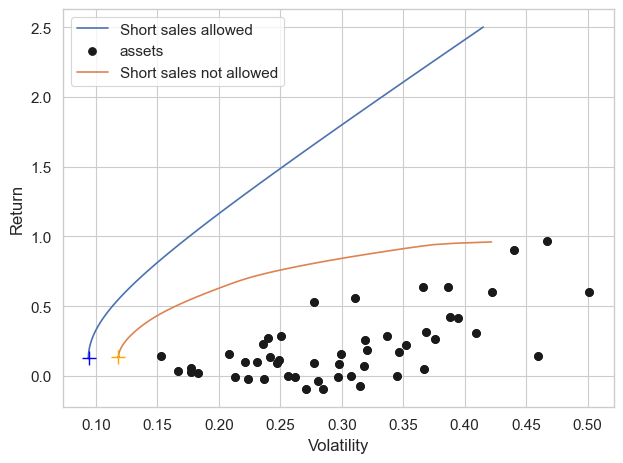

<Figure size 640x480 with 0 Axes>

In [225]:
ef = EfficientFrontier(mu, Sigma, weight_bounds=(1/50, 1/50)) #All weight bounds are equal to 1/50
minvol=ef.min_volatility()
ef.portfolio_performance(verbose=True)
performance = ef.portfolio_performance()
return3, volatility3 = performance[:2]

fig, ax = plt.subplots()

ef = EfficientFrontier(mu, Sigma, weight_bounds=(-1, 1))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False, ef_param_range=np.linspace(0.00, 2.50, 100))
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0, 1))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True, ef_param_range=np.linspace(0.00, 0.96, 100))

plt.plot([volatility1], [return1], marker='+', color='blue', markerfacecolor='red', markersize=10)
plt.plot([volatility2], [return2], marker='+', color='orange', markerfacecolor='red', markersize=10)
plt.plot([volatility3], [return3], marker='+', color='green', markerfacecolor='red', markersize=10)

plt.legend(['Short sales allowed','Short sales not allowed', 'assets', 'All weight bounds are equal to 1/50'])
plt.show()
plt.savefig('Efficient_frontiers.png')

# No need for now

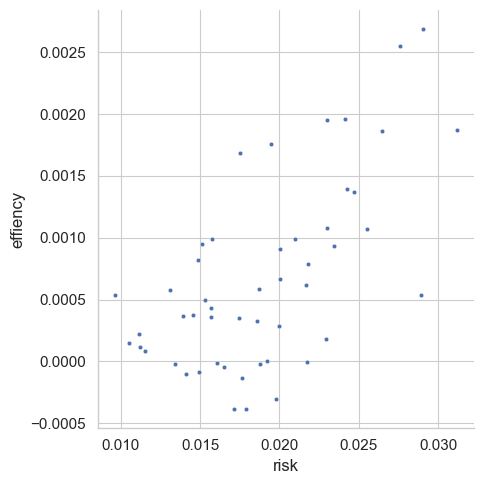

In [158]:
import seaborn as sns

sns.set_theme('paper', font_scale=1.25)

#data_eff_risk = pd.DataFrame({'effiency': eff,'risk': risk, 'company': data.columns})
data_eff_risk = pd.read_excel('outputHKstocksEffRisk.xlsx')
sns.set_style("whitegrid")
sns.color_palette("bright")
import matplotlib.pyplot as plt
sns.relplot(
    data=data_eff_risk,
    x="risk", y="effiency", s=10
) # график эффективности от рисков


plt.savefig('HK_eff_risk.png')

In [168]:
latest_prices = get_latest_prices(df_stocks)
allocation_minv, rem_minv = DiscreteAllocation(minvol_pwt, latest_prices, total_portfolio_value=100000).lp_portfolio() 
print(allocation_minv)
print("Осталось денежных средств после построения портфеля с минимальной волатильностью - {:.2f} рублей".format(rem_minv))
print()


{'0002.HK': 531, '0003.HK': 615, '0006.HK': 366, '0011.HK': 68, '0066.HK': 492, '0288.HK': 1555, '0291.HK': 104, '0669.HK': 275, '0823.HK': 129, '0868.HK': 867, '1093.HK': 225, '1929.HK': 577, '2313.HK': 83, '2331.HK': 407, '2899.HK': 1845}
Осталось денежных средств после построения портфеля с минимальной волатильностью - 5.66 рублей



In [170]:
latest_prices1 = get_latest_prices(df_stocks)
allocation_shp, rem_shp = DiscreteAllocation(sharpe_pwt, latest_prices1, total_portfolio_value=100000).lp_portfolio() 
print(allocation_shp)
print("Осталось денежных средств после построения портфеля с максимальным коэффициентом Шарпа {:.2f} рублей".format(rem_shp))

ValueError: Cannot broadcast dimensions  (64,) (50,)

# I dont clearly understand all code lower and how it works

# This is variation of creating Efficient frontier using Critical Line Algorithm

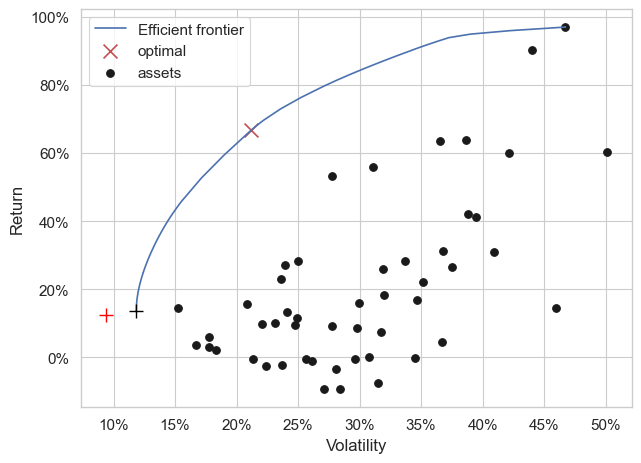

In [184]:
cl_obj = CLA(mu, Sigma)
ax = pplt.plot_efficient_frontier(cl_obj, showfig = False)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.plot([0.094], [0.125], marker='+', color='red', markerfacecolor='red', markersize=10)
plt.plot([0.118], [0.137], marker='+', color='black', markerfacecolor='red', markersize=10)